<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seal Leavel Project 
---
Using numpy to look for a correlation between time data and sea level rise

# Aim for this project
I will be using pandas, numpy, scipy, sklearn and visualisation tools to retrieve, analyse the sea level data. Try to understand the data and predicate future sea-levels by using linear regression models.

# About the data:
What it looks like (this will be illustrated through a coded function)

An explanation of what the columns show


## Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



Import the libraries we need to retreieve data.

In [2]:
import pandas as pd
import numpy as np
#from scipy.stats import linregress

## Sea Level Data Retrieval

Write a function get_dataset to read the csv file from the url pass in parameter. It returns the dataframe.

In [3]:
def get_dataset(url):
  df = pd.read_csv(url)
  return df

# Programe starts here
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'
sea_leavel_df = get_dataset(url)

## Inspect the data

Let's have a look the details and technical summary of this dataset. 

Using .head() to see the first few rows

Get technical summary to know what each column values and variables looks like by using .info() 

In [4]:
# see the first few rows
display(sea_leavel_df.head())

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


I notice some Nan/ Null values in NOAA Adjusted Sea Level column. We might have to look more. 

In [5]:
# Get technical summary 
sea_leavel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


## Cleaning, sorting, formating Data

Before proceeding any further, let's get rid of duplicates and null values to clean up the data.

In [6]:
cleaned_sealevel_df = sea_leavel_df.drop_duplicates()
print(cleaned_sealevel_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 6.3 KB
None


check if any nan values in all columns. we notice some null / nan value in the NOAA Adjusted Sea Level column.

In [7]:
null_values = cleaned_sealevel_df.isna().any()
print(null_values)

Year                        False
CSIRO Adjusted Sea Level    False
Lower Error Bound           False
Upper Error Bound           False
NOAA Adjusted Sea Level      True
dtype: bool


Let's drop of the column have Null values. 

In [8]:
cleaned_sealevel_df = cleaned_sealevel_df.drop(columns=['NOAA Adjusted Sea Level'])
print(cleaned_sealevel_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.2 KB
None


Filter out the data between year 1800 and 2013.

In [9]:
filt_year = (cleaned_sealevel_df['Year']>=1880) & (cleaned_sealevel_df['Year'] <=2013)
filted_sealevel_df = cleaned_sealevel_df[filt_year]
filted_sealevel_df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
0,1880,0.000000,-0.952756,0.952756
1,1881,0.220472,-0.732283,1.173228
2,1882,-0.440945,-1.346457,0.464567
3,1883,-0.232283,-1.129921,0.665354
4,1884,0.590551,-0.283465,1.464567
...,...,...,...,...
129,2009,8.586614,8.311024,8.862205
130,2010,8.901575,8.618110,9.185039
131,2011,8.964567,8.661417,9.267717
132,2012,9.326772,8.992126,9.661417


# Data Analyses & Visualisation
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this you can use a new numpy function np.where() )*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

### Calculate statistics 
Use numpy array() function to convert series to an array. Calculate some statistics on the level array with numpy mean() , std(), sum() functions. 

In [10]:
#Calculate some statistics on the level array for a specific column
def cal_statistics(df,col):
  nparray_col = np.array(df[col])
  # mean
  mean = np.mean(nparray_col)
  
  # standard deviation
  stddev = np.std(nparray_col)

  # total
  total = np.sum(nparray_col)

  return mean, stddev, total 

  
mean, stddev, total = cal_statistics(filted_sealevel_df,'CSIRO Adjusted Sea Level')
print('mean = ',"{:10.2f}".format(mean))
print('std dev = ',"{:10.2f}".format(stddev))
print('total =',"{:10.2f}".format(total))

mean =        3.65
std dev =        2.48
total =     489.15


Use the fact that the arrays are aligned to find the year with biggest rise in sea level and the year with the lowest rise in sea level. Using numpy max() and min() function to get the max and min see level values. Using numpy where() function to find the index of see level by passing a condition. 

In [11]:
# find the years with the biggest and lowest rise in level
nparray_sealevel = np.array(filted_sealevel_df['CSIRO Adjusted Sea Level'])
nparray_year = np.array(filted_sealevel_df['Year'])

# get the max and min sea level
max_level = np.max(nparray_sealevel)
min_level = np.min(nparray_sealevel)

# get the index of max and min sea level  
max_index = np.where(nparray_sealevel == max_level)
min_index = np.where(nparray_sealevel == min_level)

# get the year of max and min from the max , min see level index
max_year = nparray_year[max_index][0] 
min_year = nparray_year[min_index][0] 
print("The sea level was highest at", "{:10.2f}".format(max_level), "in the year", max_year)
print("The sea level was lowest at", "{:10.2f}".format(min_level), "in the year", min_year)

The sea level was highest at       9.33 in the year 2012
The sea level was lowest at      -0.44 in the year 1882


Test and check if it's correct year of the highest sea level.

In [12]:
# The code below will run and test your code to see if you have returned a series with the correct length and first row
actual = max_year
expected = 2012

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual)

Test passed 2012


### Pearson correlation coefficient

Correlation coeffcients are used to measure the strength of the linear relationship between variables. I use numpy corrcoef() function to get the correlation coefficient matrix. 

In [13]:
def cal_coef(df,col1,col2):
  #Calculate the Pearson correlation coefficient between year and the rise in sea level.
  # (Expected output: 0.98 when rounded to 2 decimal places)
  nparray_col1 = np.array(df[col1])
  nparray_col2 = np.array(df[col2])
  coef = np.corrcoef(nparray_col1,nparray_col2).round(decimals=2)
  return coef

col1 = 'Year'
col2 = 'CSIRO Adjusted Sea Level'
coef_matrix = cal_coef(filted_sealevel_df, col1, col2) 
print(f'correlation coefficient for {col1} and {col2} :\n',coef_matrix) 

correlation coefficient for Year and CSIRO Adjusted Sea Level :
 [[1.   0.98]
 [0.98 1.  ]]


A correlation coefficient > 0 indicates a positive relationship while a value < 0 signifies a negative relationship. 

correlation coefficient = 0 indicates no relationship between the two variables being compared.  

Test and check if it's correct correlation coefficient value.

In [14]:
# The code below will run and test your code to see if you have returned a series with the correct length and first row
actual = coef_matrix[0,1]
expected = 0.98

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual)

Test passed 0.98


This shows that there is a strong correlation between year and rising sea levels

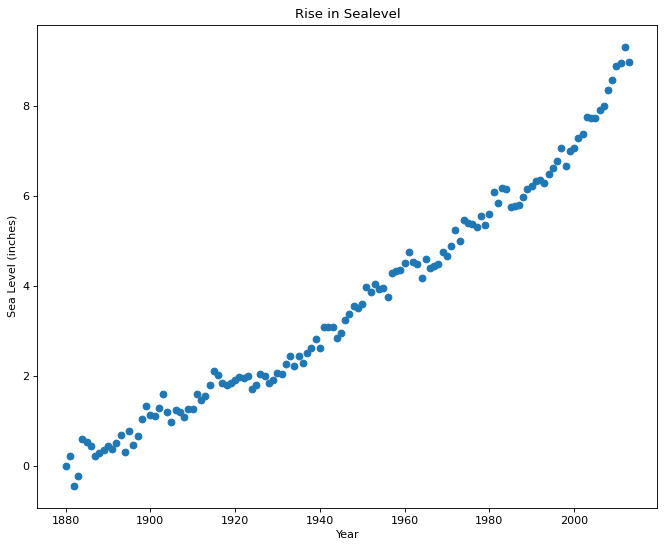

In [15]:
import matplotlib.pyplot as plt

years = filted_sealevel_df['Year']
sea_levels = filted_sealevel_df['CSIRO Adjusted Sea Level']

plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(years, sea_levels, edgecolors='face')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sealevel')
plt.show()

### Linear Regression 

We can see the sea level has been increasing between 1880 and 2000. Now, let's calculate the linear regression to predict the trend.  

I will be implementing by using 2 different methods : 

1. sklearn linear regression module

2. using linregress from scipy.stats to find the best fit. 

Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change".

I also used measurements of sea level change from 1970 to 2100, build a linear model of that changing sea level and use it to make a prediction about the future sea level rise.

**Using import LinearRegression from sklearn.linear_model to find the best fit**

In [16]:
# Import LinearRegression class
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from scipy import stats
from scipy.stats.stats import pearsonr

import numpy as np
import seaborn as sns



In [17]:
x = np.array(years).reshape(-1,1)
y = np.array(sea_levels).reshape(-1,1)


In [18]:
# build a LinearRegression model, fit to the data
model = LinearRegression(fit_intercept=True)
# fitting the model
model.fit(x, y) 

LinearRegression()

In [19]:
# give a forecast years until year 2100 
x_new = np.linspace(1970, 2050, 131).reshape(-1, 1) #an array of values you want to predict from
# predicting values : Use model to predict for many years
y_new = model.predict(x_new) #predict the levels_forecast 

# print("Prediction: year = {}, level = {:.02f}".format(x_new, y_new[0,0]))

In [20]:
# Create first line of best fit
# lineA = linregress(years, sea_levels)
# xA = np.arange(years.min(),2050,1)
# yA = xA*lineA.slope + lineA.intercept
# y_pred1 = y_new
# y_pred1 = y_pred1.reshape(-1,1)

# model.fit_intercept()
# plt.plot(xA,yA, 'r', label = 'Fitted Line 1')
# Get slope, intercept, r_value, p_value, std_err from linregress model 
# df_2000 = filted_sealevel_df[filted_sealevel_df['Year'] >= 2000]
# lineB = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
# xB = np.arange(2000,2050,1)
# yB = xB*lineB.slope + lineB.intercept

# plt.plot(xB,yB, label='>year 2000')

Use seaborn to draw scatterplot with lineplot

In [21]:
# plt.figure(figsize = (15,8))
# ax = sns.regplot(years, sea_levels, ci=None)
# sns.lineplot(x = x_new[:,0],y = y_new[:,0], color='green')
# ax.set(xlabel='Years', ylabel='Sea level')
# ax.grid(True)
# plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


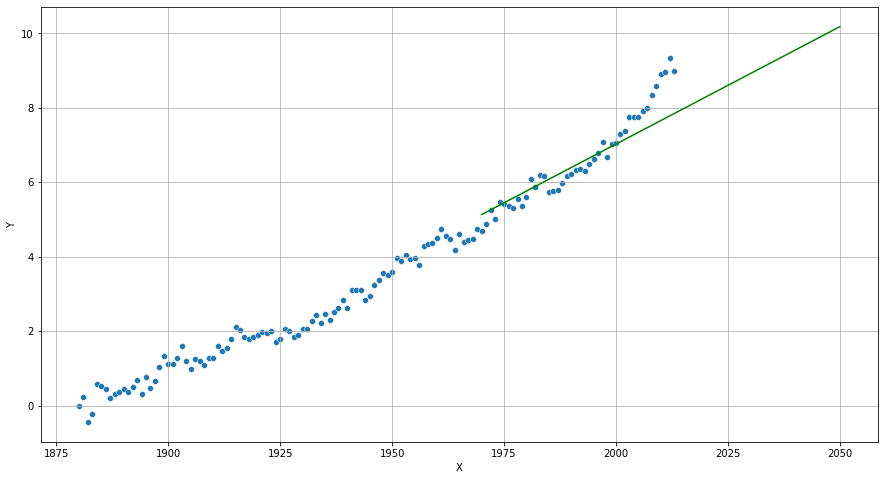

In [22]:
# plot regression line : over-plot with measured data
plt.figure(figsize = (15,8))
ax = sns.scatterplot(x[:,0],y[:,0])
# sns.regplot(x=years, y=sea_levels, data=filted_sealevel_df, color='red');
#create scatterplot with regression line
sns.lineplot(x = x_new[:,0],y = y_new[:,0], color='green')
ax.set(xlabel='X', ylabel='Y')
ax.grid(True)
plt.show()


In [23]:
# R Squared
print(f'R Squared: {model.score(x,y)}')

R Squared: 0.9697466074149554


**Using linregress from scipy.stats to find the best fit**

Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".



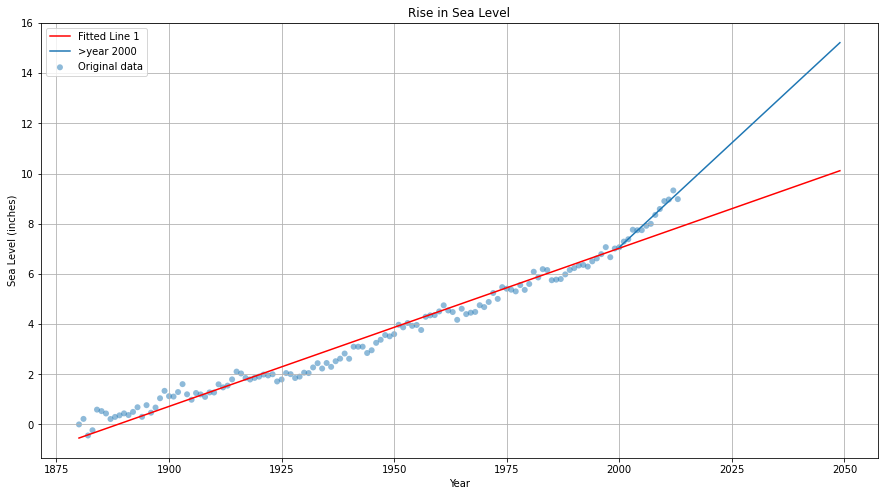

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# def draw_plot():

fig, ax = plt.subplots(figsize=(15, 8))

# Create scatter plot
# plt.scatter(years, sea_levels)
ax.scatter(years, sea_levels, label='Original data', alpha=0.5, edgecolors='none')
ax.grid(True)

# Create first line of best fit
lineA = linregress(years, sea_levels)
xA = np.arange(years.min(),2050,1)
yA = xA*lineA.slope + lineA.intercept

plt.plot(xA,yA, 'r', label = 'Fitted Line 1')

# Create second line of best fit
df_2000 = filted_sealevel_df[filted_sealevel_df['Year'] >= 2000]

# Get slope, intercept, r_value, p_value, std_err from linregress model 
lineB = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
xB = np.arange(2000,2050,1)
yB = xB*lineB.slope + lineB.intercept

plt.plot(xB,yB, label='>year 2000')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend(fontsize="medium")
plt.show()
# Save plot and return data for testing (DO NOT MODIFY)
# plt.savefig('sea_level_plot.png')
# return plt.gca()

# draw_plot()

R Squared value = explained variation / Total variation. The value is always between 0 and 100%.  

0% indicates that the model explains none of the variability of the reponse data around its mean.

100% indicates the model explains all the variability of the reponse data round its mean. 

The higher R-Squared, the better the model fits the data.

In [25]:
# R Squared
print(f'LineA R Squared: {lineA.rvalue**2}')

print(f'predicited LineB R Squared: {lineB.rvalue**2}')

LineA R Squared: 0.969746607414955
predicited LineB R Squared: 0.9531374224880818


# Conclusion


---
We got positive correlation coefficient which indicates that sea levels and the years have relationship. 

The final R-Squared values of both models are really close to 100%. It means the models fit the sea level data. However, R-squared doesn't tell us the entire story. 



# Reflection
----



## What skills have you demonstrated in completing this notebook?

Your answer: 

Retrieve, investigate, clean, sort, formate and filter data with pandas. 

Transform dataframes to array and calculate statistic with numpy library. for instance, mean, median, standard deviation, and correlation coefficient. 

Also, create Linear Regression Models with sklearn.linear_model and scipy.stats libraries. 

Finally, use matplotlib.pyplot and seaborn to create visualisation of data. Such as, scatter plot and line plot to present the 2 sets of data relationship of correlation coefficient and best fit line of linear Regression.

## What did I learn in this project?

I learned how to retrieve, investigate, clean, sort, formate and filter data with pandas. 

I've learned how to calculate statistic with numpy library. such as mean, median, standard deviation, and correlation coefficient. 

Also, create Linear Regression Models with sklearn.linear_model and scipy.stats libraries. 

Finally, use matplotlib.pyplot and seaborn to create visualisation of data.

## What caused you the most difficulty?

Your answer: 

The most difficult parts are to understand how data should be processed and what functions/methods to calculate the data statistic.  Also, how to create correlation coefficent ,create linear regressions models and explain what we found based on the model I've created.

## What are the worksheets where I learnt the skills used in this project?

**Data retrieval, Interrogating**
https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/1_Data_retrieval.ipynb

https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/2_Describing_and_Interrogating_Data.ipynb

**Sorting, cleaning, and wrangling data**
https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/3_Sorting_and_cleaning.ipynb

https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/4_Wrangle_the_data.ipynb


**Testing**
https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/13_Error_handling_and_testing.ipynb

**Analysing data**
https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/5_numpy.ipynb

**Correlation , Linear Regression**
https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/8_1_Correlation_with_linregress_WITH_scipy_library.ipynb

https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/8_2_Correlation_exercises.ipynb

**Visualisation**
https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/7_1_Visualisation_with_matplotlib.ipynb

https://github.com/sysphcd/PythonProgrammingforData/blob/main/Worksheets/7_2_Visualisation_with_Seaborn.ipynb

